In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [10]:
df = pd.read_csv('main_file_1206_wz.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
df

,RID,DIAG,VISCODE2,PTID,AGE,PTGENDER,PTEDUCAT,Phase,EXAMDATE,Ventricles,...,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,PREV_DIAG,DIAG_CHANGED,DIAG_GROUP
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,2,NL,sc,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
2,2,NL,bl,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
3,2,NL,m06,011_S_0002,74.3,Male,16.0,ADNI1,2006-06-03,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
4,2,NL,m36,011_S_0002,74.3,Male,16.0,ADNI1,2008-08-27,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22807,7102,NL,sc,341_S_7102,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22808,7103,NL,sc,013_S_7103,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22809,7104,NL,sc,153_S_7104,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22810,7105,MCI,sc,035_S_7105,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MCI,False,MCI-MCI


In [11]:
ml_cols = ['DIAG','insomnia', 'OSA', 
'ratio_Ventricles_bl',
'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
'ratio_Fusiform_bl', 'ratio_ICV_bl','NPIKTOT','ABETA','TAU']

 

ml_df_clean = df.loc[(df.DIAG_GROUP == 'MCI-AD')|(df.DIAG_GROUP == 'NL-AD'), ml_cols]
ml_df_clean = ml_df_clean.dropna(thresh=9) 
ml_df_clean = ml_df_clean.dropna()
ml_df_clean = pd.get_dummies(ml_df_clean)
ml_df_clean

,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,NPIKTOT,ABETA,TAU,DIAG_AD
951,0.0,0.0,1.304612,0.809341,0.920264,0.792420,0.876517,1.017161,1.0,560.0,253.9,1
1521,0.0,0.0,1.313395,0.936196,0.951237,0.853022,0.933932,1.007571,3.0,543.5,495.6,1
1712,0.0,1.0,1.135662,0.963142,1.000129,0.767836,0.967306,1.003015,8.0,279.2,277.5,1
1748,0.0,0.0,1.332818,0.963784,0.982598,0.720396,0.864626,1.011185,8.0,396.8,247.2,1
1820,0.0,0.0,1.062252,0.896487,0.974781,0.622315,0.886466,0.995158,4.0,500.1,308.6,1
1983,0.0,0.0,1.069613,1.045302,0.996339,0.882086,1.158639,0.998642,4.0,1474.0,313.0,1
2233,0.0,0.0,1.363578,0.880237,0.943468,0.744767,0.878624,1.002655,1.0,486.1,403.3,1
3616,0.0,1.0,1.218474,0.884068,0.967732,0.738691,0.824111,1.011852,6.0,498.5,277.8,1
5983,0.0,0.0,1.218141,0.920640,1.000114,1.173745,0.998347,1.017902,4.0,608.7,382.0,1
6375,0.0,0.0,1.227220,0.945489,0.965867,0.938491,0.986595,1.000617,8.0,878.3,267.0,1


#### my version

In [12]:
# some codes are probably missing. The dataframe has only DIAG_AD as 1. And dataframe is too small.
# my version
ml_cols = ['DIAG','insomnia', 'OSA', 
'ratio_Ventricles_bl',
'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
'ratio_Fusiform_bl', 'ratio_ICV_bl','NPIKTOT','NPIK9A','NPIK9B','NPIK9C','DIAG_GROUP']

 
ml_df_clean = df[ml_cols]

# new feature DIAG_AD
ml_df_clean['DIAG_AD'] = np.nan
ml_df_clean.loc[ml_df_clean.DIAG_GROUP == 'NL-AD' ,'DIAG_AD'] = 1
ml_df_clean.loc[ml_df_clean.DIAG_GROUP == 'MCI-AD' ,'DIAG_AD'] = 1
ml_df_clean.loc[ml_df_clean.DIAG_GROUP == 'NL-NL' ,'DIAG_AD'] = 0
ml_df_clean.loc[ml_df_clean.DIAG_GROUP == 'NL-MCI' ,'DIAG_AD'] = 0
ml_df_clean.loc[ml_df_clean.DIAG_GROUP == 'MCI-MCI' ,'DIAG_AD'] = 0
ml_df_clean.loc[ml_df_clean.DIAG_GROUP == 'MCI-NL' ,'DIAG_AD'] = 0
# drop some features
ml_df_clean = ml_df_clean.drop(['NPIK9A','NPIK9B','NPIK9C','DIAG','DIAG_GROUP'],axis=1)
ml_df_clean = ml_df_clean.dropna().reset_index(drop=True)
ml_df_clean

<ipython-input-12-0ff00c93b369>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df_clean['DIAG_AD'] = np.nan
C:\Users\weipi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,NPIKTOT,DIAG_AD
0,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,6.0,0.0
1,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,6.0,0.0
2,0.0,0.0,0.973557,0.993421,0.990747,0.82315,1.015951,0.994563,6.0,0.0
3,0.0,0.0,0.973557,0.993421,0.990747,0.82315,1.015951,0.994563,6.0,0.0
4,0.0,0.0,0.973557,0.993421,0.990747,0.82315,1.015951,0.994563,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4845,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.0,0.0
4846,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.0,0.0
4847,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.0,0.0
4848,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,0.0


In [13]:
ml_df_clean.shape

(4850, 10)

In [14]:
rus = RandomUnderSampler(random_state=432)
X_undersampled, y_unsampled = rus.fit_resample(ml_df_clean, ml_df_clean['DIAG_AD'])
X_undersampled.to_csv('ml_df_clean_undersampled.csv')
X_undersampled.groupby('DIAG_AD').count()

,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,NPIKTOT
DIAG_AD,,,,,,,,,
0.0,65,65,65,65,65,65,65,65,65
1.0,65,65,65,65,65,65,65,65,65


In [6]:
drop_lst = ['DIAG_AD']
target = 'DIAG_AD'
k = 10
cv_models(ml_df_clean,drop_lst,target,k)

After undersampling data size is 130 ; Resampled dataset shape Counter({0.0: 65, 1.0: 65})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.639
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.639
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.639
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.639
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.641
          - saga_L1, average weighted f1-score of 10-cross validation:0.639
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.641
       - C = 1
          - lbfgs_L2, a

          - 25trees. average weighted f1-score of 10-cross validation:0.769
          - 30trees. average weighted f1-score of 10-cross validation:0.749
          - 35trees. average weighted f1-score of 10-cross validation:0.756
          - 40trees. average weighted f1-score of 10-cross validation:0.773
          - 45trees. average weighted f1-score of 10-cross validation:0.771
          - 50trees. average weighted f1-score of 10-cross validation:0.771
          - 55trees. average weighted f1-score of 10-cross validation:0.748
          - 60trees. average weighted f1-score of 10-cross validation:0.756
          - 65trees. average weighted f1-score of 10-cross validation:0.770
          - 70trees. average weighted f1-score of 10-cross validation:0.760
          - 75trees. average weighted f1-score of 10-cross validation:0.752
          - 80trees. average weighted f1-score of 10-cross validation:0.770
          - 85trees. average weighted f1-score of 10-cross validation:0.752
          - 

After undersampling data size is 130 ; Resampled dataset shape Counter({0.0: 65, 1.0: 65})

6 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


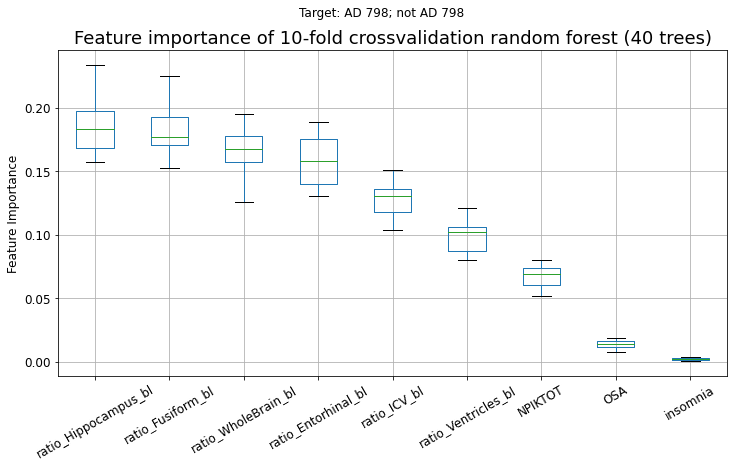

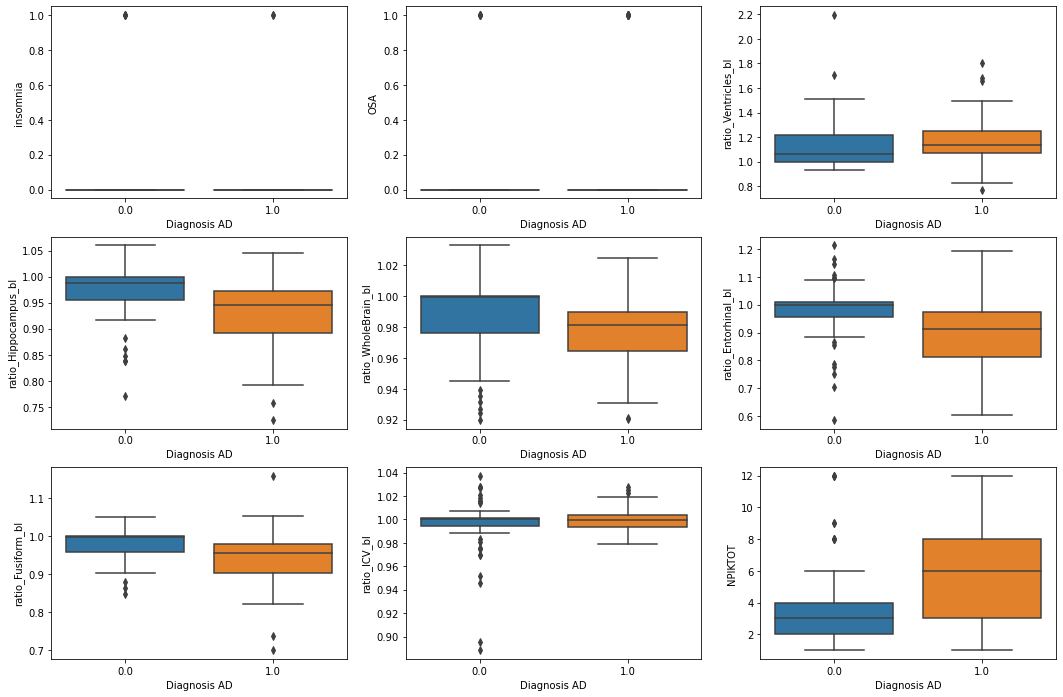

In [7]:
# 40trees. average weighted f1-score of 10-cross validation:0.773
n = 40
res = usampling_scale_data(ml_df_clean,drop_lst,target)  
lst = ['insomnia', 'OSA', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'NPIKTOT']
X_ = res[0]  # unscaled input
y_ = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X_,y_,clf,k,title_label)
plt.suptitle('Target: AD 798; not AD 798')

# plot the diagnosis distribution 
df_new = X_.copy()
df_new[target] = y_
f,axes = plt.subplots(nrows = 3,ncols=3,figsize=(18,12))
axes = axes.ravel()


for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set(xlabel='Diagnosis AD')

In [8]:
# not use insomnia and OSA

drop_lst = ['DIAG_AD','OSA','insomnia']
target = 'DIAG_AD'
k = 10
cv_models(ml_df_clean,drop_lst,target,k)

After undersampling data size is 130 ; Resampled dataset shape Counter({0.0: 65, 1.0: 65})

5 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.639
          - saga_L1, average weighted f1-score of 10-cross validation:0.309
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.639
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.639
          - saga_L1, average weighted f1-score of 10-cross validation:0.317
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.639
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.639
          - saga_L1, average weighted f1-score of 10-cross validation:0.639
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.639
       - C = 1
          - lbfgs_L2, a

          - 25trees. average weighted f1-score of 10-cross validation:0.789
          - 30trees. average weighted f1-score of 10-cross validation:0.789
          - 35trees. average weighted f1-score of 10-cross validation:0.795
          - 40trees. average weighted f1-score of 10-cross validation:0.780
          - 45trees. average weighted f1-score of 10-cross validation:0.779
          - 50trees. average weighted f1-score of 10-cross validation:0.780
          - 55trees. average weighted f1-score of 10-cross validation:0.786
          - 60trees. average weighted f1-score of 10-cross validation:0.794
          - 65trees. average weighted f1-score of 10-cross validation:0.794
          - 70trees. average weighted f1-score of 10-cross validation:0.788
          - 75trees. average weighted f1-score of 10-cross validation:0.779
          - 80trees. average weighted f1-score of 10-cross validation:0.772
          - 85trees. average weighted f1-score of 10-cross validation:0.773
          - 

After undersampling data size is 1596 ; Resampled dataset shape Counter({0.0: 798, 1.0: 798})

4 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


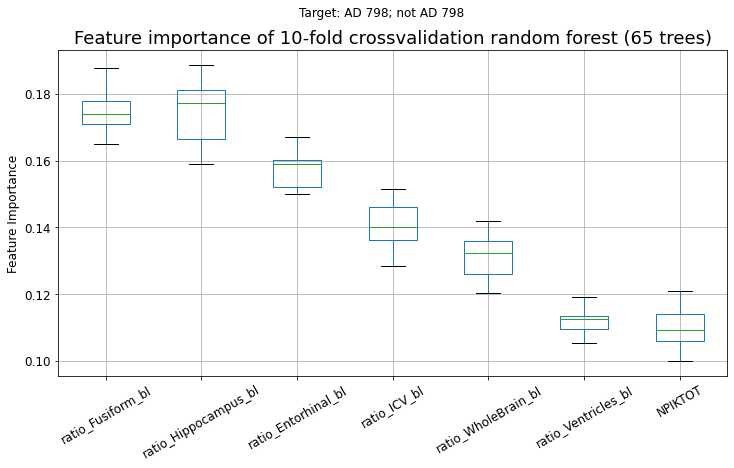

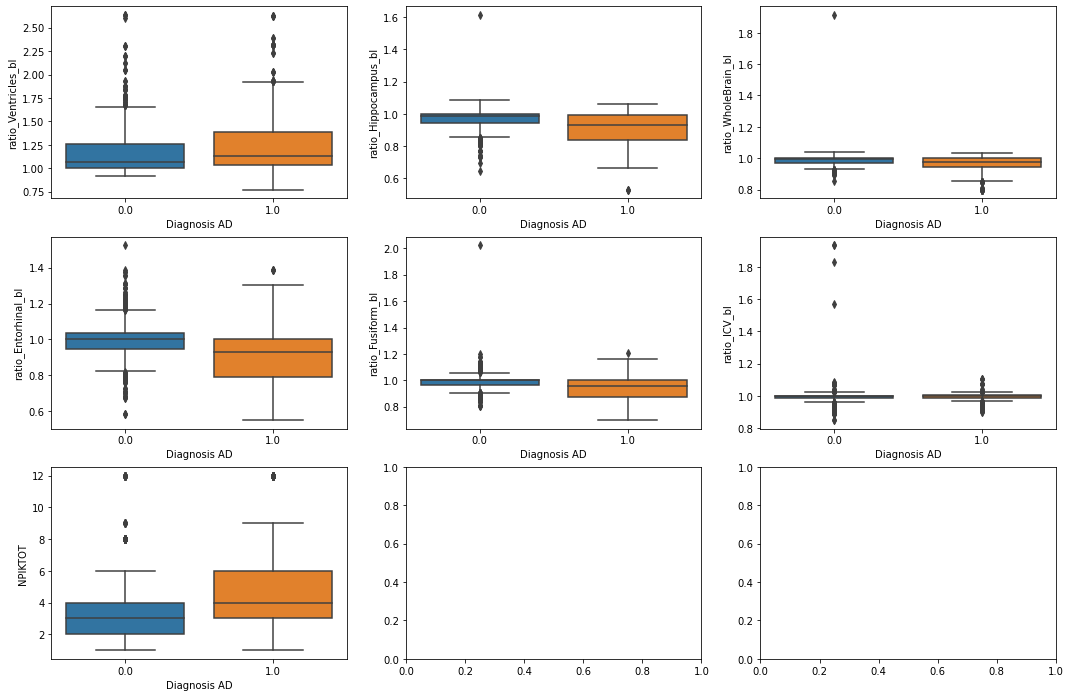

In [21]:
# - 65trees. average weighted f1-score of 10-cross validation:0.751
n = 65
res = usampling_scale_data(ml_df_clean,drop_lst,target)  
lst = ['ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'NPIKTOT']
X_ = res[0]  # unscaled input
y_ = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X_,y_,clf,k,title_label)
plt.suptitle('Target: AD 798; not AD 798')

# plot the diagnosis distribution 
df_new = X_.copy()
df_new[target] = y_
f,axes = plt.subplots(nrows = len(lst)//3+1,ncols=3,figsize=(18,12))
axes = axes.ravel()


for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set(xlabel='Diagnosis AD')       